<p style="font-size:40px"><b>
    Project 1: Ensemble Classfication
    <p style="font-size:20px">Lukasz Filipek</p>
</b></p>

# Imports/Settings

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython import display

from sklearn.preprocessing import OneHotEncoder, Imputer, normalize
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.cross_validation import train_test_split, KFold
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from scipy.stats import ttest_ind, bartlett

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option("display.max_rows",999)
pd.set_option('display.max_columns',999)

In [5]:
# df = pd.read_csv('D:/School/csc529/project1/lifeInsurance.csv')

In [6]:
df = pd.read_csv('C:/Users/290002325/Desktop/project/lifeInsurance.csv')

# Data Exploration

Slighly imbalanced class. Will take into consideration when looking at accuracy metrics

In [7]:
print(df.Response.value_counts(),'\n\n')
print(df.Response.value_counts()/len(df))

1    19489
0    11233
Name: Response, dtype: int64 


1    0.634366
0    0.365634
Name: Response, dtype: float64


In [8]:
df.shape

(30722, 128)

In [9]:
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.03,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.20,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.05,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,10,1,D2,26,0.230769,3,1,1,0.507463,0.836364,0.299163,0.364887,0.325,15,1,0.0,2,1.00,1,2,8,3,1,1,1,2,1,3,2,0.005000,1,3,2,2,NaN,0.294118,0.507042,NaN,6.0,491,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,2,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
df.dtypes

Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
Insurance_History_7      int64
Insurance_History_8      int64
Insuranc

In [11]:
df.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30719.000000,30722.000000,30722.000000,27087.000000,30722.000000,25372.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,17447.000000,30722.000000,30722.000000,30722.000000,30722.000000,18230.000000,11006.000000,22962.000000,7087.000000,25557.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,253.000000,30722.000000,30722.000000,30722.000000,30722.000000,5559.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,1828.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,566.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000,30722.000000
mean,39569.022199,1.024282,24.180392,0.377563,2.006477,2.661545,1.043682,0.373428,0.702926,0.266626,0.429106,0.080169,8.

In [12]:
df.Product_Info_3.value_counts()

26    25880
10     3619
29      602
31      259
15      127
37       99
30       28
11       24
28       18
8        16
36       14
4        13
23        5
9         4
21        3
33        3
17        2
27        1
38        1
22        1
13        1
5         1
1         1
Name: Product_Info_3, dtype: int64

Product_Info_2 is a categorical variable with strings

In [13]:
nulls = df.isnull().sum() / len(df)
nulls[nulls > 0].sort_values()

Employment_Info_1      0.000098
Employment_Info_4      0.118319
Medical_History_1      0.168121
Employment_Info_6      0.174142
Family_Hist_4          0.252588
Family_Hist_2          0.406614
Insurance_History_5    0.432101
Family_Hist_3          0.641755
Family_Hist_5          0.769318
Medical_History_15     0.819055
Medical_History_24     0.940499
Medical_History_32     0.981577
Medical_History_10     0.991765
dtype: float64

# Kfold Function

In [14]:
yVars = df.Response

def kfoldFunction(variables, mClassifier, cv = 5, verbose = False, plot = True):
    accuracy = []
    precision = []
    recall = []
    kf = KFold(len(variables), n_folds = cv)

    for train_index, test_index in kf:
        xTrain, xTest = variables.iloc[train_index], variables.iloc[test_index]
        yTrain, yTest = yVars.iloc[train_index], yVars.iloc[test_index]

        mClassifier = mClassifier.fit(xTrain, yTrain)
        mPredict = mClassifier.predict(xTest)

        if verbose == True:
            print('Accuracy:', accuracy_score(yTest, mPredict), '\n')
            print(classification_report(yTest, mPredict))
            print(pd.DataFrame(confusion_matrix(yTest, mPredict), columns = ['PredF','PredT'], index = ['F','T']), '\n\n\n')
        accuracy.append(accuracy_score(yTest, mPredict))
        precision.append(precision_score(yTest, mPredict))
        recall.append(recall_score(yTest, mPredict))
    
    if plot == True:
        plt.figure()
        plt.title('Accuracy: Mean {} | SD {}'.format(round(np.average(accuracy),4), round(np.std(accuracy),4)))
        metrics = pd.DataFrame([accuracy,precision,recall]).T
        metrics.columns = ['accuracy','precision','recall']
        sns.boxplot(metrics)
    return(metrics)

# Analysis

# Categorical Variables

## Feature Engineering

Extract the letter and number from this product feature. It is not clear what these codes mean exactly; however, there could be an interesting hidden meaning.

In [15]:
df.Product_Info_2.value_counts()
df['Product_Info_2_alpha'] = df.Product_Info_2.str[:1]
df['Product_Info_2_num'] = df.Product_Info_2.str[1:]

## Create Dummies

Alpha Numeric Categorical

In [16]:
dummies = pd.get_dummies(df[['Product_Info_2_num', 'Product_Info_2_alpha']])

Numeric Categorical

In [27]:
prodInfo = df.columns[df.columns.str.contains('Product_Info')]
catVarsProd_Info = df[prodInfo]

empInfo = df.columns[df.columns.str.contains('Employment_Info')]
catVarsEmp_Info = df[empInfo]

insInfo = df.columns[df.columns.str.contains('InsuredInfo')]
catVarsIns_Info = df[insInfo]

insHist = df.columns[df.columns.str.contains('Insurance_History')]
catVarsIns_Hist = df[insHist]

catVarsFam_Hist = df[['Family_Hist_1']]

medHist = df.columns[df.columns.str.contains('Medical_History')]
catVarsMed_Hist = df[medHist]

medKey = df.columns[df.columns.str.contains('Medical_Key')]
catVarsMed_Key = df[medKey]

In [29]:
catVars = pd.concat([catVarsProd_Info, catVarsEmp_Info, catVarsIns_Hist, catVarsIns_Info], axis = 1)
catVarsMed = pd.concat([catVarsFam_Hist, catVarsMed_Hist, catVarsMed_Key], axis = 1)

Check for Nulls

In [38]:
nulls = catVars.isnull().sum() / len(df)
nulls[nulls > 0].sort_values()

Series([], dtype: float64)

In [39]:
nulls = catVarsMed.isnull().sum() / len(df)
nulls[nulls > 0].sort_values()

Series([], dtype: float64)

Encode Dummy Variables

In [40]:
dumCoder = OneHotEncoder()
catVars = pd.DataFrame(dumCoder.fit_transform(catVars).toarray())
catVars = pd.concat([catVars, dummies], axis = 1)
catVarsMed = pd.DataFrame(dumCoder.fit_transform(catVarsMed).toarray())

## Cross Validation and Grid Search through Params

In [41]:
catVars.shape

(30722, 123)

### Random Forest: catVars

In [20]:
rfc = RandomForestClassifier(n_jobs = -1)
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5,10,15,30]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 5, verbose = 1)
CV_rfc.fit(catVars, yVars)
print(CV_rfc.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  2.3min
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.1min finished


{'max_depth': 15, 'n_estimators': 1000}


### Decision Tree: catVars

In [21]:
dtc = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3,5,10,15],
    'criterion': ['gini','entropy']
}

CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv = 5, verbose = 1)
CV_dtc.fit(catVars, yVars)
print(CV_dtc.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'criterion': 'gini', 'max_depth': 5}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    5.6s finished


### AdaBoost Tree: catVars

In [22]:
dtc = AdaBoostClassifier()
param_grid = {
    'n_estimators': [50,75,100],
    'learning_rate': [.3,.5,1,1.5]
}

CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv = 5, verbose = 1, n_jobs = -1)
CV_dtc.fit(catVars, yVars)
print(CV_dtc.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   37.0s finished


{'learning_rate': 0.5, 'n_estimators': 50}


## Model to Choose model for Ensemble

#### Random Forest

Random Forests are greedy and will choose more trees if given, but 100 trees show stable results

Accuracy: 0.692482915718 

             precision    recall  f1-score   support

          0       0.59      0.45      0.51      1088
          1       0.73      0.82      0.78      1985

avg / total       0.68      0.69      0.68      3073

   PredF  PredT
F    491    597
T    348   1637 



Accuracy: 0.684347543117 

             precision    recall  f1-score   support

          0       0.57      0.44      0.50      1096
          1       0.73      0.82      0.77      1977

avg / total       0.67      0.68      0.67      3073

   PredF  PredT
F    487    609
T    361   1616 



Accuracy: 0.688151041667 

             precision    recall  f1-score   support

          0       0.60      0.47      0.52      1131
          1       0.72      0.82      0.77      1941

avg / total       0.68      0.69      0.68      3072

   PredF  PredT
F    526    605
T    353   1588 



Accuracy: 0.7021484375 

             precision    recall  f1-score   support

          0       0.62      0.43      0

C:\Users\Lukasz\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


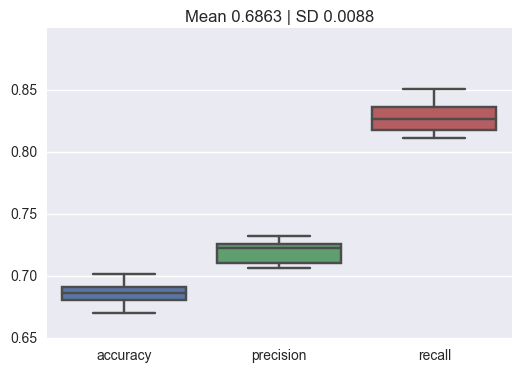

In [65]:
rtc = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_depth = 15, n_jobs = -1)
accuracy_rtc = kfoldFunction(catVars, rtc, verbose = True, cv = 10)

#### Decision Tree

Accuracy: 0.693784575334 

             precision    recall  f1-score   support

          0       0.59      0.43      0.50      1088
          1       0.73      0.84      0.78      1985

avg / total       0.68      0.69      0.68      3073

   PredF  PredT
F    466    622
T    319   1666 



Accuracy: 0.674910510901 

             precision    recall  f1-score   support

          0       0.56      0.40      0.47      1096
          1       0.71      0.83      0.77      1977

avg / total       0.66      0.67      0.66      3073

   PredF  PredT
F    441    655
T    344   1633 



Accuracy: 0.683268229167 

             precision    recall  f1-score   support

          0       0.60      0.43      0.50      1131
          1       0.71      0.83      0.77      1941

avg / total       0.67      0.68      0.67      3072

   PredF  PredT
F    488    643
T    330   1611 



Accuracy: 0.695638020833 

             precision    recall  f1-score   support

          0       0.61      0.40     

C:\Users\Lukasz\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


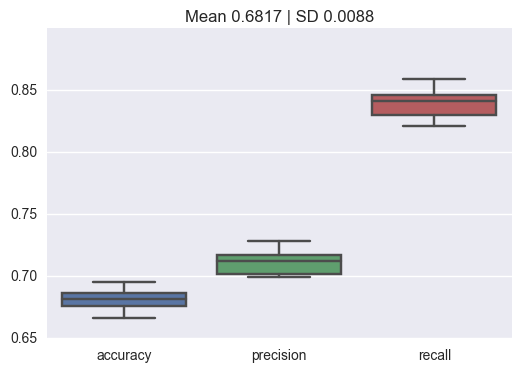

In [67]:
dtc = DecisionTreeClassifier(max_depth = 5)
accuracy_dtc = kfoldFunction(catVars, dtc, verbose = True, cv = 10)

In [60]:
ttest_ind(accuracy_rtc, accuracy_dtc, equal_var = False)

Ttest_indResult(statistic=1.1885291412365762, pvalue=0.25007622028957516)

#### AdaBoost Tree

Accuracy: 0.694109990238 

             precision    recall  f1-score   support

          0       0.59      0.45      0.51      1088
          1       0.73      0.83      0.78      1985

avg / total       0.68      0.69      0.68      3073

   PredF  PredT
F    493    595
T    345   1640 



Accuracy: 0.673283436381 

             precision    recall  f1-score   support

          0       0.56      0.42      0.48      1096
          1       0.72      0.81      0.76      1977

avg / total       0.66      0.67      0.66      3073

   PredF  PredT
F    464    632
T    372   1605 



Accuracy: 0.687825520833 

             precision    recall  f1-score   support

          0       0.60      0.44      0.51      1131
          1       0.72      0.83      0.77      1941

avg / total       0.68      0.69      0.68      3072

   PredF  PredT
F    503    628
T    331   1610 



Accuracy: 0.705403645833 

             precision    recall  f1-score   support

          0       0.63      0.44     

C:\Users\Lukasz\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


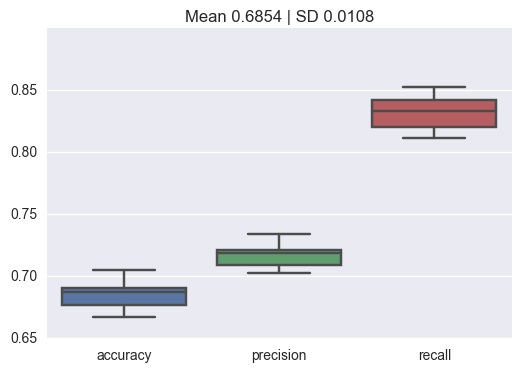

In [66]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate = .5)
accuracy_abc = kfoldFunction(catVars, abc, verbose = True, cv = 10)

In [61]:
print(ttest_ind(accuracy_rtc, accuracy_abc, equal_var = False))
print(ttest_ind(accuracy_dtc, accuracy_abc, equal_var = False))

Ttest_indResult(statistic=0.25143879815568049, pvalue=0.80442032563226085)
Ttest_indResult(statistic=-0.81706905611991287, pvalue=0.42501544987429418)


We have to reject that any model is more accurate than the other. We will choose the Random Forest because of the most likely to be more accurate.

### Random Forest: catVarsMed

In [24]:
catVarsMed.shape

(30722, 661)

In [69]:
rfc = RandomForestClassifier(n_jobs = -1, n_estimators = 100)
param_grid = {
    'max_depth': [10,15,30,50],
    'criterion': ['gini','entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 5, verbose = 1)
CV_rfc.fit(catVarsMed, yVars)
print(CV_rfc.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.3min finished


{'criterion': 'gini', 'max_depth': 30}


### Decision Tree: catVarsMed

In [33]:
dtc = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3,5,10,15],
    'criterion': ['gini','entropy']
}

CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv = 5, verbose = 1)
CV_dtc.fit(catVarsMed, yVars)
print(CV_dtc.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.8min finished


{'criterion': 'entropy', 'max_depth': 10}


### AdaBoost Tree: catVarsMed

In [62]:
abc = AdaBoostClassifier()
param_grid = {
    'n_estimators': [50,75,100],
    'learning_rate': [.3,.5,1,1.5]
}

CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid, cv = 5, verbose = 1, n_jobs = -1)
CV_abc.fit(catVarsMed, yVars)
print(CV_abc.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed: 13.4min
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 16.8min finished


{'learning_rate': 1.5, 'n_estimators': 75}


## Modeling to Choose model for Ensemble

#### Random Forest

Random Forests are greedy and will choose more trees if given, but 100 trees show stable results

Accuracy: 0.792385291246 

             precision    recall  f1-score   support

          0       0.74      0.64      0.69      1088
          1       0.82      0.88      0.84      1985

avg / total       0.79      0.79      0.79      3073

   PredF  PredT
F    698    390
T    248   1737 



Accuracy: 0.779043280182 

             precision    recall  f1-score   support

          0       0.70      0.67      0.68      1096
          1       0.82      0.84      0.83      1977

avg / total       0.78      0.78      0.78      3073

   PredF  PredT
F    734    362
T    317   1660 



Accuracy: 0.791666666667 

             precision    recall  f1-score   support

          0       0.76      0.64      0.69      1131
          1       0.81      0.88      0.84      1941

avg / total       0.79      0.79      0.79      3072

   PredF  PredT
F    724    407
T    233   1708 



Accuracy: 0.79296875 

             precision    recall  f1-score   support

          0       0.73      0.67      0.7

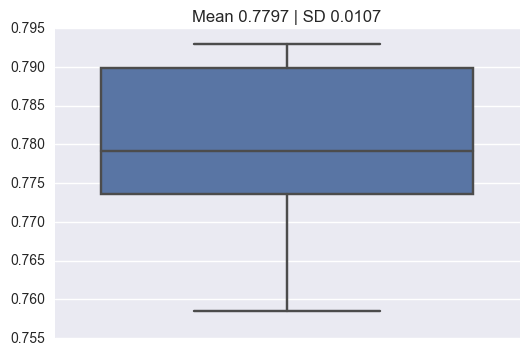

In [71]:
rtc = RandomForestClassifier(n_estimators=100, max_depth = 30, n_jobs = -1)
accuracy_rtc = kfoldFunction(catVarsMed, rtc, verbose = True, cv = 10)

#### Decision Tree

Accuracy: 0.79108363163 

             precision    recall  f1-score   support

          0       0.74      0.63      0.68      1088
          1       0.81      0.88      0.84      1985

avg / total       0.79      0.79      0.79      3073

   PredF  PredT
F    684    404
T    238   1747 



Accuracy: 0.772534982102 

             precision    recall  f1-score   support

          0       0.69      0.67      0.68      1096
          1       0.82      0.83      0.82      1977

avg / total       0.77      0.77      0.77      3073

   PredF  PredT
F    730    366
T    333   1644 



Accuracy: 0.786783854167 

             precision    recall  f1-score   support

          0       0.74      0.64      0.69      1131
          1       0.81      0.87      0.84      1941

avg / total       0.78      0.79      0.78      3072

   PredF  PredT
F    726    405
T    250   1691 



Accuracy: 0.790364583333 

             precision    recall  f1-score   support

          0       0.72      0.68      

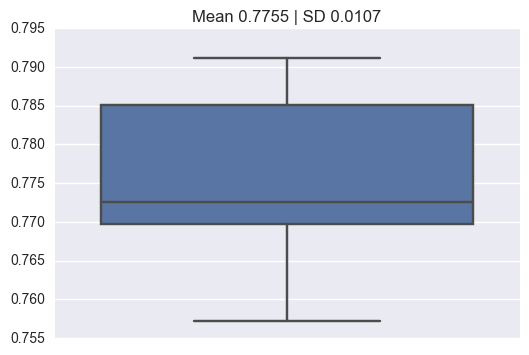

In [160]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
accuracy_dtc = kfoldFunction(catVarsMed, dtc, verbose = True, cv = 10)

In [75]:
ttest_ind(accuracy_rtc, accuracy_dtc, equal_var = False)

Ttest_indResult(statistic=0.78225956668986452, pvalue=0.44426370204293653)

#### AdaBoost Tree

Accuracy: 0.787504067686 

             precision    recall  f1-score   support

          0       0.73      0.64      0.68      1088
          1       0.82      0.87      0.84      1985

avg / total       0.78      0.79      0.78      3073

   PredF  PredT
F    699    389
T    264   1721 



Accuracy: 0.77806703547 

             precision    recall  f1-score   support

          0       0.70      0.66      0.68      1096
          1       0.82      0.85      0.83      1977

avg / total       0.78      0.78      0.78      3073

   PredF  PredT
F    718    378
T    304   1673 



Accuracy: 0.787760416667 

             precision    recall  f1-score   support

          0       0.74      0.65      0.69      1131
          1       0.81      0.87      0.84      1941

avg / total       0.78      0.79      0.78      3072

   PredF  PredT
F    738    393
T    259   1682 



Accuracy: 0.779947916667 

             precision    recall  f1-score   support

          0       0.71      0.65      

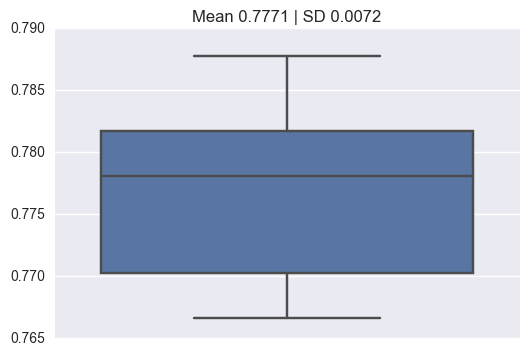

In [76]:
abc = AdaBoostClassifier(n_estimators=75, learning_rate = 1.5)
accuracy_abc = kfoldFunction(catVarsMed, abc, verbose = True, cv = 10)

In [77]:
print(ttest_ind(accuracy_rtc, accuracy_abc, equal_var = False))
print(ttest_ind(accuracy_dtc, accuracy_abc, equal_var = False))

Ttest_indResult(statistic=0.59817240469309174, pvalue=0.55823142466243159)
Ttest_indResult(statistic=-0.30683844098827689, pvalue=0.76286480833439507)


We have to reject that any model is more accurate than the other. We will choose the Random Forest because of the most likely to be more accurate.

# Continuous Variables

In [42]:
contvars = ['Product_Info_4', 
'Ins_Age', 'Ht', 'Wt', 'BMI', 
'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 
'Insurance_History_5', 
'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']
contVars = df[contvars]

In [43]:
contVars.isnull().sum()/len(df)

Product_Info_4         0.000000
Ins_Age                0.000000
Ht                     0.000000
Wt                     0.000000
BMI                    0.000000
Employment_Info_1      0.000098
Employment_Info_4      0.118319
Employment_Info_6      0.174142
Insurance_History_5    0.432101
Family_Hist_2          0.406614
Family_Hist_3          0.641755
Family_Hist_4          0.252588
Family_Hist_5          0.769318
dtype: float64

Create Dummies for NULLS

In [44]:
contVars['Employment_Info_1_d'] = contVars['Employment_Info_1'].isnull()*1
contVars['Employment_Info_4_d'] = contVars['Employment_Info_4'].isnull()*1
contVars['Employment_Info_6_d'] = contVars['Employment_Info_6'].isnull()*1
contVars['Insurance_History_5_d'] = contVars['Insurance_History_5'].isnull()*1
contVars['Family_Hist_2_d'] = contVars['Family_Hist_2'].isnull()*1
contVars['Family_Hist_3_d'] = contVars['Family_Hist_3'].isnull()*1
contVars['Family_Hist_4_d'] = contVars['Family_Hist_4'].isnull()*1
contVars['Family_Hist_5_d'] = contVars['Family_Hist_5'].isnull()*1

C:\Users\Lukasz\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Lukasz\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Lukasz\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [45]:
dummies = ['Employment_Info_1_d','Employment_Info_4_d', 'Employment_Info_6_d', 'Insurance_History_5_d','Family_Hist_2_d','Family_Hist_3_d','Family_Hist_4_d','Family_Hist_5_d']

## Impute

In [46]:
imputer = Imputer(strategy = 'median')
imputer = imputer.fit_transform(contVars)

In [47]:
contVars = pd.DataFrame(imputer, columns = contVars.columns)

## Correlation

In [51]:
contVarsCorr = contVars.drop(dummies, axis=1).corr()

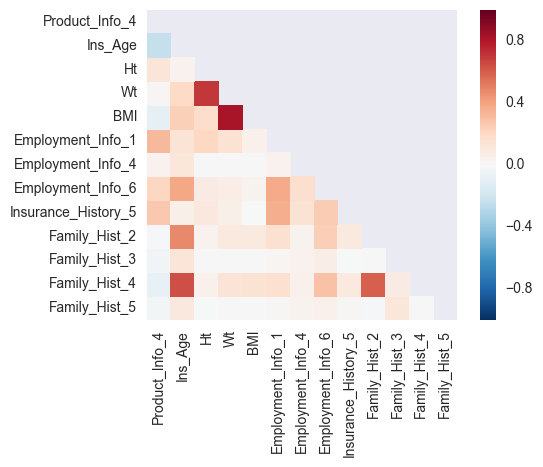

In [59]:
mask = np.zeros_like(contVarsCorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(contVarsCorr, mask=mask, square=True)

## PCA

In [85]:
pca = PCA(n_components=3)
pca = pca.fit(contVars.drop(dummies, axis = 1))

In [86]:
pcaComps = pd.DataFrame(pca.components_, columns = contVars.drop(dummies, axis = 1).columns).T
pcaComps[abs(pcaComps) > 0.40].fillna('')

,0,1,2
Product_Info_4,,0.847427,
Ins_Age,,-0.415129,0.560935
Ht,,,
Wt,,,
BMI,,,
Employment_Info_1,,,
Employment_Info_4,,,
Employment_Info_6,0.868695,,-0.433753
Insurance_History_5,,,
Family_Hist_2,,,


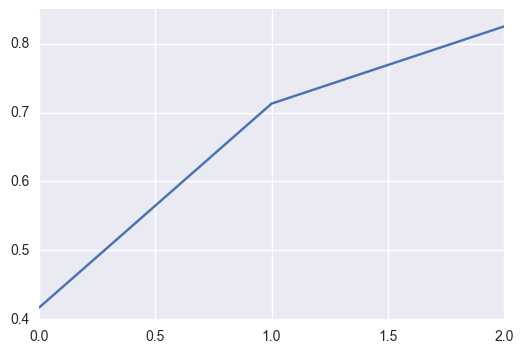

In [87]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [88]:
contVarsRotate = pd.DataFrame(pca.fit_transform(contVars.drop(dummies, axis = 1)))

## Model using PCA

In [500]:
Train, Test = train_test_split(pd.concat([contVarsRotate, yVars], axis = 1))

xTrain = Train.drop('Response', axis = 1)
yTrain = Train['Response']

xTest = Test.drop('Response', axis = 1)
yTest = Test['Response']

### Decision Tree

In [89]:
contVarsRotate.shape

(30722, 3)

In [93]:
dtc = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3,5,10,15],
    'criterion': ['gini','entropy']
}

CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv = 5, verbose = 1)
CV_dtc.fit(contVarsRotate, yVars)
print(CV_dtc.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'criterion': 'entropy', 'max_depth': 5}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.0s finished


Accuracy: 0.648226488773 

             precision    recall  f1-score   support

          0       0.51      0.27      0.35      1088
          1       0.68      0.86      0.76      1985

avg / total       0.62      0.65      0.61      3073

   PredF  PredT
F    294    794
T    287   1698 



Accuracy: 0.652782297429 

             precision    recall  f1-score   support

          0       0.53      0.27      0.36      1096
          1       0.68      0.86      0.76      1977

avg / total       0.63      0.65      0.62      3073

   PredF  PredT
F    298    798
T    269   1708 



Accuracy: 0.63671875 

             precision    recall  f1-score   support

          0       0.51      0.24      0.33      1131
          1       0.66      0.87      0.75      1941

avg / total       0.61      0.64      0.60      3072

   PredF  PredT
F    274    857
T    259   1682 



Accuracy: 0.6455078125 

             precision    recall  f1-score   support

          0       0.51      0.26      0.34 

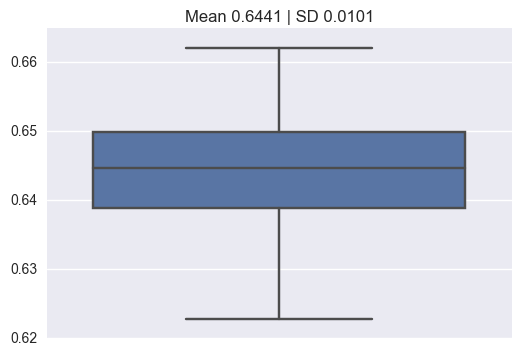

In [94]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
accuracy_dtc = kfoldFunction(contVarsRotate, dtc, verbose = True, cv = 10)

The model is not providing a substantional amount of predictive power above random.

## Model using Regular Variables

In [99]:
contVars.shape

(30722, 21)

### Cross Validation and Grid Search through Params

#### K-Nearnest Neighbors

In [102]:
knc = KNeighborsClassifier(n_neighbors=100, p=2, n_jobs=-1)
param_grid = {
    'p': [1,2],
    'n_neighbors': [30,50,100,150]
}

CV_knc = GridSearchCV(estimator=knc, param_grid=param_grid, cv = 5, verbose = 1)
CV_knc.fit(contVars.drop(dummies, axis=1), yVars)
print(CV_knc.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'n_neighbors': 100, 'p': 1}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   44.3s finished


#### Random Forest

In [103]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=100)
param_grid = {
    'max_depth': [5,10,15,30],
    'criterion': ['gini','entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 5, verbose = 1)
CV_rfc.fit(contVars, yVars)
print(CV_rfc.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   29.0s finished


{'criterion': 'gini', 'max_depth': 10}


#### K-Nearnest Neighbors

Accuracy: 0.744874715262 

             precision    recall  f1-score   support

          0       0.77      0.40      0.53      1088
          1       0.74      0.93      0.83      1985

avg / total       0.75      0.74      0.72      3073

   PredF  PredT
F    435    653
T    131   1854 



Accuracy: 0.749105109014 

             precision    recall  f1-score   support

          0       0.76      0.43      0.55      1096
          1       0.75      0.92      0.83      1977

avg / total       0.75      0.75      0.73      3073

   PredF  PredT
F    475    621
T    150   1827 



Accuracy: 0.7490234375 

             precision    recall  f1-score   support

          0       0.81      0.41      0.55      1131
          1       0.73      0.94      0.83      1941

avg / total       0.76      0.75      0.72      3072

   PredF  PredT
F    469    662
T    109   1832 



Accuracy: 0.742838541667 

             precision    recall  f1-score   support

          0       0.77      0.40      0

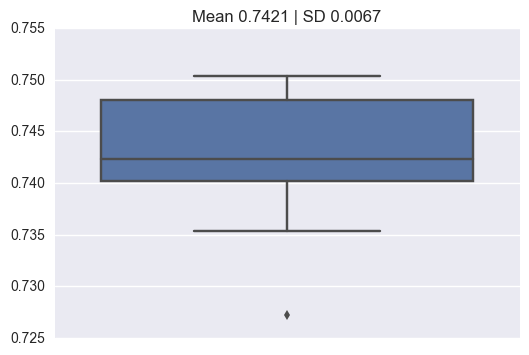

In [112]:
knc = KNeighborsClassifier(n_neighbors=100, p=1, n_jobs=-1)
accuracy_knc = kfoldFunction(contVars, knc, verbose = True, cv = 10)

#### Random Forest

Accuracy: 0.777741620566 

             precision    recall  f1-score   support

          0       0.82      0.48      0.60      1088
          1       0.77      0.94      0.85      1985

avg / total       0.78      0.78      0.76      3073

   PredF  PredT
F    523    565
T    118   1867 



Accuracy: 0.785876993166 

             precision    recall  f1-score   support

          0       0.82      0.52      0.63      1096
          1       0.78      0.94      0.85      1977

avg / total       0.79      0.79      0.77      3073

   PredF  PredT
F    565    531
T    127   1850 



Accuracy: 0.786783854167 

             precision    recall  f1-score   support

          0       0.86      0.50      0.64      1131
          1       0.77      0.95      0.85      1941

avg / total       0.80      0.79      0.77      3072

   PredF  PredT
F    571    560
T     95   1846 



Accuracy: 0.779947916667 

             precision    recall  f1-score   support

          0       0.83      0.49     

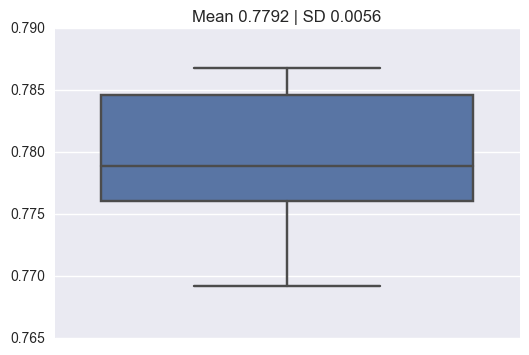

In [113]:
rtc = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1)
accuracy_rtc = kfoldFunction(contVars, rtc, verbose = True, cv = 10)

In [115]:
ttest_ind(accuracy_rtc, accuracy_knc, equal_var = False)

Ttest_indResult(statistic=12.800198414186463, pvalue=2.7181764906510059e-10)

We reject the hypothesis that both models have the same accuracy. I choose the random forest.

# Discrete Variables

Note:
There are many missing values

In [71]:
discvars = ['Medical_History_1', 'Medical_History_15','Medical_History_24']
discVars = df[discvars]

In [72]:
discVars.shape

(30722, 3)

In [73]:
discVars.isnull().sum()/len(df)

Medical_History_1     0.168121
Medical_History_15    0.819055
Medical_History_24    0.940499
dtype: float64

Create Dummies for NULLS

In [74]:
discVars['MedHist1Dum'] = df['Medical_History_1'].isnull()*1
discVars['MedHist15Dum'] = df['Medical_History_15'].isnull()*1
discVars['MedHist24Dum'] = df['Medical_History_24'].isnull()*1
discVars = discVars.fillna(0)

C:\Users\Lukasz\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Lukasz\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Lukasz\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

#### Random Forest

In [124]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=100)
param_grid = {
    'max_depth': [3,5,10,15],
    'criterion': ['gini','entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 5, verbose = 1)
CV_rfc.fit(discVars, yVars)
print(CV_rfc.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   14.2s finished


{'criterion': 'gini', 'max_depth': 5}


#### K-Nearnest Neighbors

In [132]:
discVarsNorm = pd.DataFrame(normalize(discVars.drop(['MedHist1Dum','MedHist15Dum','MedHist24Dum'], axis=1)))
knc = KNeighborsClassifier(n_neighbors=100, p=2, n_jobs=-1)
param_grid = {
    'p': [1,2],
    'n_neighbors': [30,50,100,150]
}

CV_knc = GridSearchCV(estimator=knc, param_grid=param_grid, cv = 5, verbose = 1)
CV_knc.fit(discVarsNorm, yVars)
print(CV_knc.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   40.6s finished


{'n_neighbors': 150, 'p': 2}


#### Random Forest

Accuracy: 0.700943703222 

             precision    recall  f1-score   support

          0       0.80      0.21      0.33      1088
          1       0.69      0.97      0.81      1985

avg / total       0.73      0.70      0.64      3073

   PredF  PredT
F    224    864
T     55   1930 



Accuracy: 0.684998372925 

             precision    recall  f1-score   support

          0       0.77      0.17      0.27      1096
          1       0.68      0.97      0.80      1977

avg / total       0.71      0.68      0.61      3073

   PredF  PredT
F    182    914
T     54   1923 



Accuracy: 0.689453125 

             precision    recall  f1-score   support

          0       0.83      0.20      0.32      1131
          1       0.68      0.98      0.80      1941

avg / total       0.73      0.69      0.62      3072

   PredF  PredT
F    222    909
T     45   1896 



Accuracy: 0.686197916667 

             precision    recall  f1-score   support

          0       0.76      0.18      0.

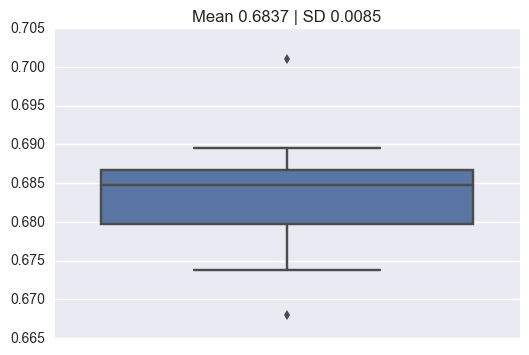

In [125]:
rtc = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1)
accuracy_rtc = kfoldFunction(discVars, rtc, verbose = True, cv = 10)

#### K-Nearnest Neighbors

Accuracy: 0.682069638789 

             precision    recall  f1-score   support

          0       0.65      0.22      0.33      1088
          1       0.69      0.93      0.79      1985

avg / total       0.67      0.68      0.63      3073

   PredF  PredT
F    244    844
T    133   1852 



Accuracy: 0.655060201757 

             precision    recall  f1-score   support

          0       0.54      0.23      0.32      1096
          1       0.68      0.89      0.77      1977

avg / total       0.63      0.66      0.61      3073

   PredF  PredT
F    248    848
T    212   1765 



Accuracy: 0.660807291667 

             precision    recall  f1-score   support

          0       0.62      0.20      0.31      1131
          1       0.67      0.93      0.78      1941

avg / total       0.65      0.66      0.60      3072

   PredF  PredT
F    231    900
T    142   1799 



Accuracy: 0.663411458333 

             precision    recall  f1-score   support

          0       0.58      0.21     

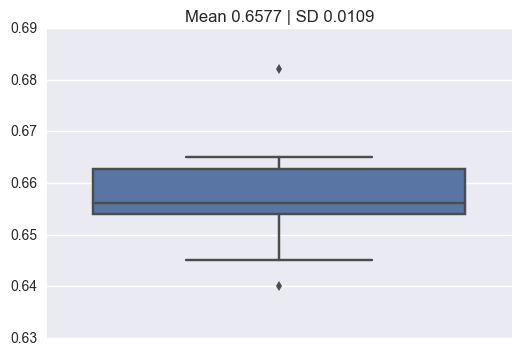

In [133]:
knc = KNeighborsClassifier(n_neighbors=150, p=2, n_jobs=-1)
accuracy_knc = kfoldFunction(discVarsNorm, knc, verbose = True, cv = 10)

In [135]:
ttest_ind(accuracy_rtc, accuracy_knc, equal_var = False)

Ttest_indResult(statistic=5.6281231851052276, pvalue=3.021757670321496e-05)

We reject that the two models have the same accuracy. We choose the Random Forest.

# Creating an Ensemble

# Kfold Ensemble Function

In [154]:
print(catVars.shape)
print(contVars.shape)
print(catVarsMed.shape)
print(discVars.shape)

(30722, 123)
(30722, 21)
(30722, 661)
(30722, 6)


In [77]:
def kfoldEnsembleFunction():
    accuracy = []
    precision = []
    recall = []
    kf = KFold(len(df), n_folds = 10)

    for train_index, test_index in kf:
        xTrain_catVars, xTest_catVars = catVars.iloc[train_index], catVars.iloc[test_index]
        xTrain_catVarsMed, xTest_catVarsMed = catVarsMed.iloc[train_index], catVarsMed.iloc[test_index]
        xTrain_contVars, xTest_contVars = contVars.iloc[train_index], contVars.iloc[test_index]
        xTrain_discVars, xTest_discVars = discVars.iloc[train_index], discVars.iloc[test_index]
        yTrain, yTest = yVars.iloc[train_index], yVars.iloc[test_index]
        
        rtc_catVars = RandomForestClassifier(n_estimators=100, max_depth = 15, n_jobs = -1)
        rtc_catVars = rtc_catVars.fit(xTrain_catVars, yTrain)
        rtc_catVarsPred = rtc_catVars.predict(xTest_catVars)

        rtc_catVarsMed = RandomForestClassifier(n_estimators=100, max_depth = 30, n_jobs = -1)
        rtc_catVarsMed = rtc_catVarsMed.fit(xTrain_catVarsMed, yTrain)
        rtc_catVarsMedPred = rtc_catVarsMed.predict(xTest_catVarsMed)

        rtc_contVars = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1)
        rtc_contVars = rtc_contVars.fit(xTrain_contVars, yTrain)
        rtc_contVarsPred = rtc_contVars.predict(xTest_contVars)

        rtc_discVars = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1)
        rtc_discVars = rtc_discVars.fit(xTrain_discVars, yTrain)
        rtc_discVarsPred = rtc_discVars.predict(xTest_discVars)
        
        ensemblePredict = pd.DataFrame([rtc_catVarsPred * 0.9, rtc_catVarsMedPred * 1.05, rtc_contVarsPred* 1.05]).T
        ensemblePredict.columns = ['rtc_catVarsPred', 'rtc_catVarsMedPred','rtc_contVarsPred']
        ensemblePredict['ensemble'] = (ensemblePredict.sum(axis = 1) > 2) * 1        
        
        
        print('Accuracy:', accuracy_score(yTest, ensemblePredict['ensemble']), '\n')
        print(classification_report(yTest, ensemblePredict['ensemble']))
        print(pd.DataFrame(confusion_matrix(yTest, ensemblePredict['ensemble']), columns = ['PredF','PredT'], index = ['F','T']), '\n\n\n')
        
        accuracy.append(accuracy_score(yTest, ensemblePredict['ensemble']))
        precision.append(precision_score(yTest, ensemblePredict['ensemble']))
        recall.append(recall_score(yTest, ensemblePredict['ensemble']))
        
    plt.figure()
    plt.title('Mean {} | SD {}'.format(round(np.average(accuracy),4), round(np.std(accuracy),4)))
    
    metrics = pd.DataFrame([accuracy,precision,recall]).T
    metrics.columns = ['accuracy','precision','recall']
    sns.boxplot(metrics)
    
    return(accuracy)

Accuracy: 0.825252196551 

             precision    recall  f1-score   support

          0       0.72      0.83      0.77      1088
          1       0.90      0.82      0.86      1985

avg / total       0.83      0.83      0.83      3073

   PredF  PredT
F    900    188
T    349   1636 



Accuracy: 0.805076472502 

             precision    recall  f1-score   support

          0       0.69      0.83      0.75      1096
          1       0.89      0.79      0.84      1977

avg / total       0.82      0.81      0.81      3073

   PredF  PredT
F    908    188
T    411   1566 



Accuracy: 0.829752604167 

             precision    recall  f1-score   support

          0       0.74      0.82      0.78      1131
          1       0.89      0.83      0.86      1941

avg / total       0.84      0.83      0.83      3072

   PredF  PredT
F    929    202
T    321   1620 



Accuracy: 0.826822916667 

             precision    recall  f1-score   support

          0       0.72      0.84     

C:\Users\Lukasz\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


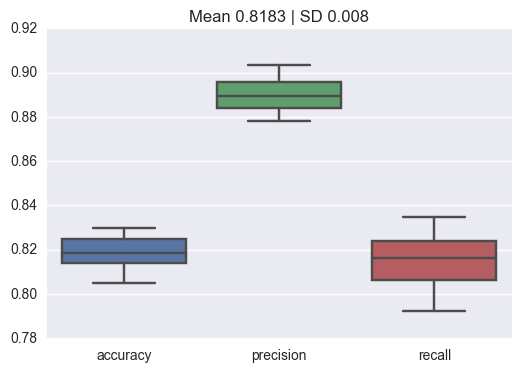

In [78]:
accuracyEnsemble = kfoldEnsembleFunction()

#### Random Forest

Accuracy: 0.793036121054 

             precision    recall  f1-score   support

          0       0.74      0.65      0.69      1088
          1       0.82      0.87      0.85      1985

avg / total       0.79      0.79      0.79      3073

   PredF  PredT
F    702    386
T    250   1735 



Accuracy: 0.778392450374 

             precision    recall  f1-score   support

          0       0.70      0.67      0.68      1096
          1       0.82      0.84      0.83      1977

avg / total       0.78      0.78      0.78      3073

   PredF  PredT
F    730    366
T    315   1662 



Accuracy: 0.7900390625 

             precision    recall  f1-score   support

          0       0.75      0.64      0.69      1131
          1       0.81      0.88      0.84      1941

avg / total       0.79      0.79      0.79      3072

   PredF  PredT
F    725    406
T    239   1702 



Accuracy: 0.792317708333 

             precision    recall  f1-score   support

          0       0.73      0.67      0

C:\Users\Lukasz\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


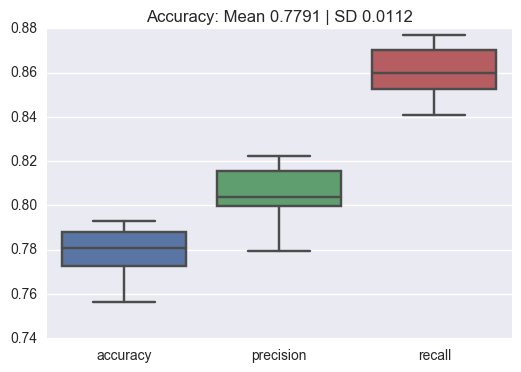

In [76]:
rtc = RandomForestClassifier(n_estimators=100, max_depth = 30, n_jobs = -1)
accuracy_rtc = kfoldFunction(catVarsMed, rtc, verbose = True, cv = 10)

In [184]:
ttest_ind(accuracyEnsemble, accuracy_rtc, equal_var = True)

Ttest_indResult(statistic=36.311960828967749, pvalue=2.7194691185129952e-18)

In [181]:
bartlett(accuracy_rtc, accuracyEnsemble)

BartlettResult(statistic=0.20060975257352334, pvalue=0.65422912084785212)

The final model is statistically more accurate. The variance of the two models is the same. In addition, the enemble model makes far less false positives.